1.	State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.
2.	Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
3.	Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
4.	If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)


In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats # Many functions for probability distributions in python are in scipy.stats
import os
from scipy.stats import variation 


In [2]:
df=pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [11]:
df.shape

(440, 9)

In [12]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [21]:
#Q1-Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [16]:
df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

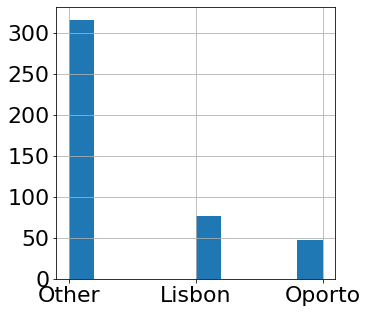

In [213]:
plt.figure(figsize=(5,5))

df['Region'].hist(xlabelsize=22,ylabelsize=22)

In [20]:
#INFRENCE 1:Based on the Valuecount function and the representations on the histogram we can clearly see the maximum spending was in the others category and the least was seen in the oporto region.

In [18]:
df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

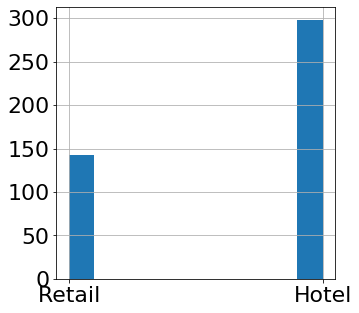

In [214]:
plt.figure(figsize=(5,5))

df['Channel'].hist(xlabelsize=22,ylabelsize=22)

In [ ]:
#INFRENCE 2:Based on the Valuecount function and the representations on the histogram we can clearly see the maximum spending was in the Hotes category and the least was seen in the Retail sector.

In [ ]:
#Q2)There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [263]:
total = df.loc[:,['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum()
total

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

In [221]:
pd.pivot_table(df,'Fresh','Region','Channel',aggfunc = np.sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,761233,93600,854833
Oporto,326215,138506,464721
Other,2928269,1032308,3960577
All,4015717,1264414,5280131


In [222]:
pd.pivot_table(df,'Milk','Region','Channel',aggfunc = np.sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,228342,194112,422454
Oporto,64519,174625,239144
Other,735753,1153006,1888759
All,1028614,1521743,2550357


In [223]:
pd.pivot_table(df,'Grocery','Region','Channel',aggfunc = np.sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,237542,332495,570037
Oporto,123074,310200,433274
Other,820101,1675150,2495251
All,1180717,2317845,3498562


In [224]:
pd.pivot_table(df,'Frozen','Region','Channel',aggfunc = np.sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,184512,46514,231026
Oporto,160861,29271,190132
Other,771606,158886,930492
All,1116979,234671,1351650


In [225]:
pd.pivot_table(df,'Detergents_Paper','Region','Channel',aggfunc = np.sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,56081,148055,204136
Oporto,13516,159795,173311
Other,165990,724420,890410
All,235587,1032270,1267857


In [226]:
pd.pivot_table(df,'Delicatessen','Region','Channel',aggfunc = np.sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,70632,33695,104327
Oporto,30965,23541,54506
Other,320358,191752,512110
All,421955,248988,670943


Buyer/Spender                                                   97020
Channel             RetailRetailRetailHotelRetailRetailRetailRetai...
Region              OtherOtherOtherOtherOtherOtherOtherOtherOtherO...
Fresh                                                         5280131
Milk                                                          2550357
Grocery                                                       3498562
Frozen                                                        1351650
Detergents_Paper                                              1267857
Delicatessen                                                   670943
zscore                                                   -2.32037e-14
dtype: object

In [ ]:
#INFRENCE 2:we see that some categories like Milk, Grocery & Detergents_Paperhave higher spend in the Retail channel versus Hotel
#On the other hand, Fresh and Frozen have higher consumption in the Hotel channel versus Retail, across all regions.
#Also, if we plot a box plot we can summarize that the spend for Fresh and groceries is the maximum across region and channel while for Delicatessen it is the least across region and channel


In [ ]:
#Q3-On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

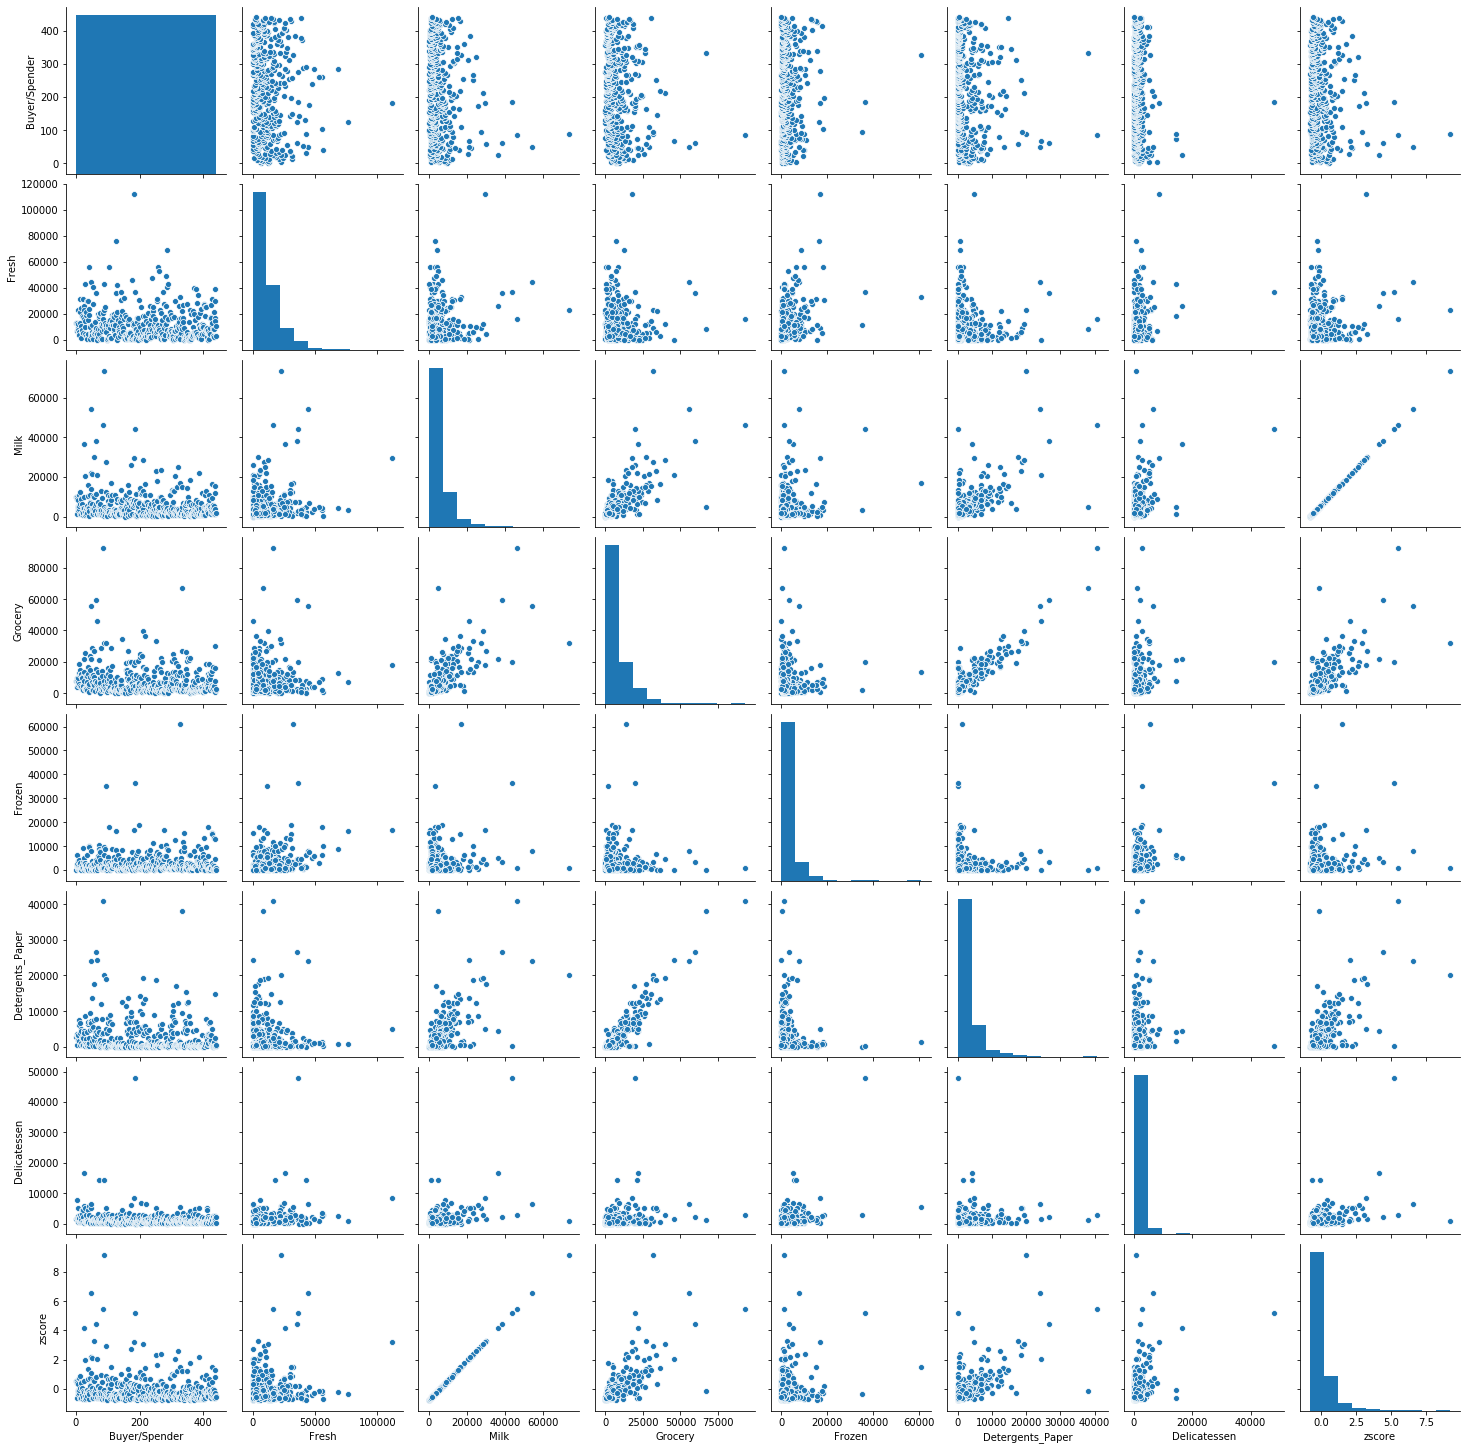

In [158]:
sns.pairplot(df)


In [166]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Fresh),stats.skew(df.Milk),stats.skew(df.Grocery),stats.skew(df.Frozen),stats.skew(df.Detergents_Paper),stats.skew(df.Delicatessen)]},
                        index=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])
Skewness

,Skewness
Fresh,2.552583
Milk,4.039922
Grocery,3.575187
Frozen,5.887826
Detergents_Paper,3.619458
Delicatessen,11.113534


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4F2F87E88>]],
      dtype=object)

<Figure size 360x360 with 0 Axes>

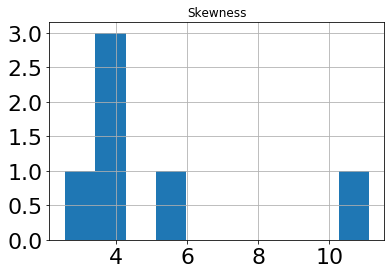

In [302]:
plt.figure(figsize=(5,5))

Skewness.hist(xlabelsize=22,ylabelsize=22)


In [125]:
#The Python library pandas has a skew() function to compute the skewness of data values across a given axis of a DataFrame instance.
##Based on the following computed figures the Delicatessens Category is the most inconsistent and the Fresh Produce seems to be the least inconsitent.


In [126]:
 #Q4-Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,2.205000e+02,127.161315,1.00000,110.750000,220.500000,330.250000,440.000000
Fresh,440.0,1.200030e+04,12647.328865,3.00000,3127.750000,8504.000000,16933.750000,112151.000000
Milk,440.0,5.796266e+03,7380.377175,55.00000,1533.000000,3627.000000,7190.250000,73498.000000
Grocery,440.0,7.951277e+03,9503.162829,3.00000,2153.000000,4755.500000,10655.750000,92780.000000
Frozen,440.0,3.071932e+03,4854.673333,25.00000,742.250000,1526.000000,3554.250000,60869.000000
Detergents_Paper,440.0,2.881493e+03,4767.854448,3.00000,256.750000,816.500000,3922.000000,40827.000000
Delicatessen,440.0,1.524870e+03,2820.105937,3.00000,408.250000,965.500000,1820.250000,47943.000000
zscore,440.0,-5.273559e-17,1.000000,-0.77791,-0.577649,-0.293923,0.188877,9.173208


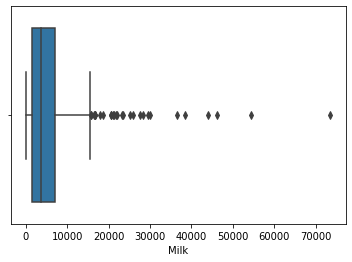

In [128]:
sns.boxplot('Milk',data=df)


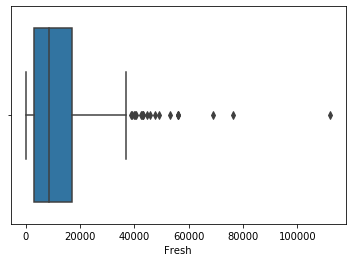

In [120]:
sns.boxplot('Fresh',data=df)

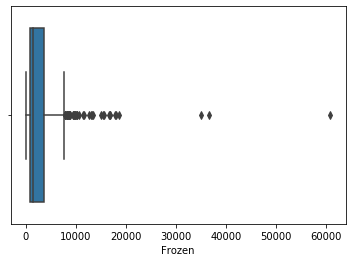

In [121]:
sns.boxplot('Frozen',data=df)

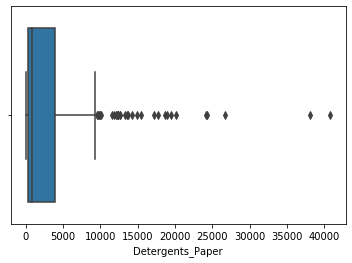

In [122]:
sns.boxplot('Detergents_Paper',data=df)

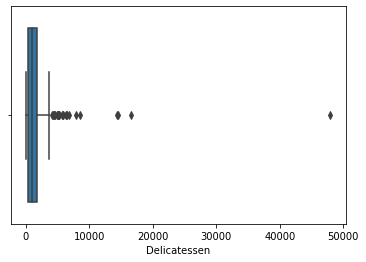

In [123]:
sns.boxplot('Delicatessen',data=df

In [187]:
df.shape

(440, 10)

In [188]:
min_thresold, max_thresold = df.Milk.quantile([0.05, 0.95])
df[(df['Milk']<max_thresold) & (df['Milk']>min_thresold)]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,zscore
0,1,Retail,Other,12669,9656,7561,214,2674,1338,0.522972
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,0.543839
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,0.408073
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,-0.623310
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,-0.052337
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,0.847482
436,437,Hotel,Other,39228,1431,764,4510,93,2346,-0.591469
437,438,Retail,Other,14531,15488,30243,437,14841,1867,1.313176
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,-0.516947


In [190]:
Outliers_Milk=440-396
Outliers_Milk

44

In [191]:
min_thresold, max_thresold = df.Fresh.quantile([0.05, 0.95])
df[(df['Fresh']<max_thresold) & (df['Fresh']>min_thresold)]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,zscore
0,1,Retail,Other,12669,9656,7561,214,2674,1338,0.522972
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,0.543839
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,0.408073
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,-0.623310
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,-0.052337
...,...,...,...,...,...,...,...,...,...,...
434,435,Hotel,Other,16731,3922,7994,688,2371,838,-0.253953
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,0.847482
437,438,Retail,Other,14531,15488,30243,437,14841,1867,1.313176
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,-0.516947


In [196]:
Outliers_Fresh=440-396
Outliers_Fresh

44

In [192]:
min_thresold, max_thresold = df.Milk.quantile([0.05, 0.95])
df[(df['Grocery']<max_thresold) & (df['Grocery']>min_thresold)]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,zscore
0,1,Retail,Other,12669,9656,7561,214,2674,1338,0.522972
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,0.543839
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,0.408073
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,-0.623310
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,-0.052337
...,...,...,...,...,...,...,...,...,...,...
434,435,Hotel,Other,16731,3922,7994,688,2371,838,-0.253953
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,0.847482
436,437,Hotel,Other,39228,1431,764,4510,93,2346,-0.591469
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,-0.516947


In [202]:
Outliers_Grocery=440-374
Outliers_Grocery

66

In [193]:
min_thresold, max_thresold = df.Milk.quantile([0.05, 0.95])
df[(df['Frozen']<max_thresold) & (df['Frozen']>min_thresold)]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,zscore
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,0.543839
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,0.408073
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,-0.623310
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,-0.052337
5,6,Retail,Other,9413,8259,5126,666,1795,1451,0.333687
...,...,...,...,...,...,...,...,...,...,...
433,434,Hotel,Other,1982,3218,1493,1541,356,1449,-0.349341
434,435,Hotel,Other,16731,3922,7994,688,2371,838,-0.253953
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,0.847482
436,437,Hotel,Other,39228,1431,764,4510,93,2346,-0.591469


In [200]:
Outliers_Frozen=440-340
Outliers_Frozen

100

In [194]:
min_thresold, max_thresold = df.Milk.quantile([0.05, 0.95])
df[(df['Detergents_Paper']<max_thresold) & (df['Detergents_Paper']>min_thresold)]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,zscore
0,1,Retail,Other,12669,9656,7561,214,2674,1338,0.522972
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,0.543839
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,0.408073
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,-0.052337
5,6,Retail,Other,9413,8259,5126,666,1795,1451,0.333687
...,...,...,...,...,...,...,...,...,...,...
428,429,Hotel,Other,3047,5970,4910,2198,850,317,0.023540
431,432,Hotel,Other,8533,5506,5160,13486,1377,1498,-0.039329
432,433,Hotel,Other,21117,1162,4754,269,1328,395,-0.627917
434,435,Hotel,Other,16731,3922,7994,688,2371,838,-0.253953


In [199]:
Outliers_Detergents_Paper=440-237
Outliers_Detergents_Paper

203

In [195]:
min_thresold, max_thresold = df.Milk.quantile([0.05, 0.95])
df[(df['Delicatessen']<max_thresold) & (df['Delicatessen']>min_thresold)]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,zscore
0,1,Retail,Other,12669,9656,7561,214,2674,1338,0.522972
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,0.543839
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,0.408073
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,-0.623310
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,-0.052337
...,...,...,...,...,...,...,...,...,...,...
434,435,Hotel,Other,16731,3922,7994,688,2371,838,-0.253953
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,0.847482
436,437,Hotel,Other,39228,1431,764,4510,93,2346,-0.591469
437,438,Retail,Other,14531,15488,30243,437,14841,1867,1.313176


In [197]:
Outliers_Delicatessen=440-290
Outliers_Delicatessen

150

In [206]:
Outliers = pd.DataFrame({'Outliers' :[Outliers_Fresh,Outliers_Milk,Outliers_Grocery,Outliers_Frozen,Outliers_Detergents_Paper,Outliers_Delicatessen]},
                    index=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])
Outliers

,Outliers
Fresh,44
Milk,44
Grocery,66
Frozen,100
Detergents_Paper,203
Delicatessen,150


In [ ]:
#Q5-On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [290]:
df2 = df.drop( ['Buyer/Spender','Channel','Region','zscore'], axis=1)
Totals=df2.sum()
Totals

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

([<matplotlib.patches.Wedge at 0x1c4f2f52608>,
 [Text(0.4646943537423714, 0.9970251539454559, 'Fresh'),
  Text(-1.0426809169323177, 0.3504518589837719, 'Milk'),
  Text(-0.6167281602164499, -0.9108492610723428, 'Grocery'),
  Text(0.47556761347886634, -0.9918847942226031, 'Frozen'),
  Text(0.931507510707914, -0.5850587641380527, 'Detergents_Paper'),
  Text(1.0885865665919394, -0.1580483692910923, 'Delicatessen')])

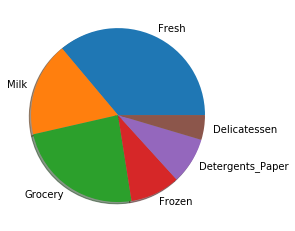

In [300]:
plt.pie(Totals, explode=None, labels=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'], colors=None, autopct=None, shadow=True)
